# This notebook is the beginning of my TELCO PROJECT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
raw_telco_df = acquire.get_telco_data()
telco = raw_telco_df.copy()

In [3]:
telco.shape

(7043, 24)

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


# I utilized my prep_telco and split_telco_data functions from prepare.py to get the data ready

### Remember how we call functions from file please

In [6]:
# take note of how we had to call the prepare.py file here
telco = prepare.prep_telco(telco)

In [8]:
#here, we reassign the three values returned from the split_data function to new variables
train, validate, test = prepare.split_telco_data(telco)
print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

train: (3943, 61)
validate: (1691, 61)
test: (1409, 61)


In [10]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = telco.drop(columns=['churn_Yes'])
y_train = telco.churn_Yes

X_validate = telco.drop(columns=['churn_Yes'])
y_validate = telco.churn_Yes

X_test = telco.drop(columns=['churn_Yes'])
y_test = telco.churn_Yes

In [11]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')


print(f'X_validate: {X_validate.shape}')
print(f'y_validate: {y_validate.shape}')


print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (7043, 60)
y_train: (7043,)
X_validate: (7043, 60)
y_validate: (7043,)
X_test: (7043, 60)
y_test: (7043,)


# At this point, we now have our train, validate, test data sets

In [13]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
gender_Male,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
partner_Yes,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents_Yes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
phone_service_Yes,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
multiple_lines_No phone service,7043.0,0.096834,0.295752,0.00,0.00,0.00,0.00,1.00
multiple_lines_Yes,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00


# Univariate analysis:

In [14]:
# this cell is isolating the number format columns for analysis below

num_cols = X_train.columns[[X_train[col].dtype in ('int64', 'float64') for col in X_train.columns]]
num_cols = list(num_cols)
to_append = ["gender_Male", "partner_Yes","dependents_Yes"]
for var in to_append:
    num_cols.append(var)

num_cols

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes']

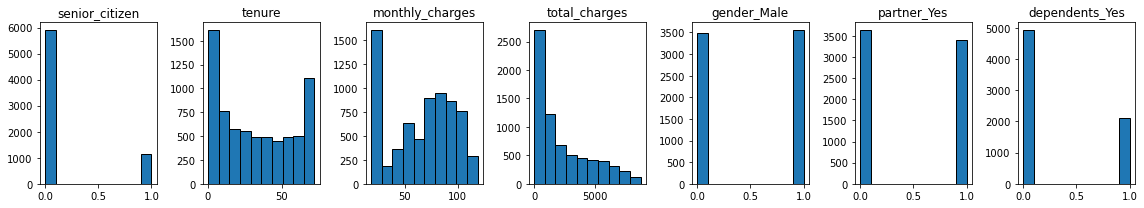

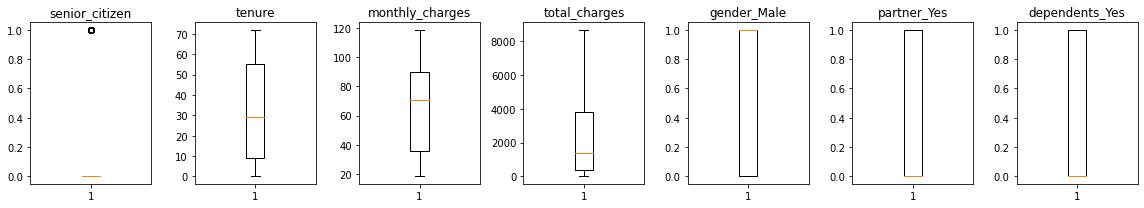

In [17]:
plt.figure(figsize=(16, 3))

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    X_train[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    plt.boxplot(X_train[col])
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [17]:
telco_y_train.value_counts()


0    2897
1    1046
Name: churn_Yes, dtype: int64

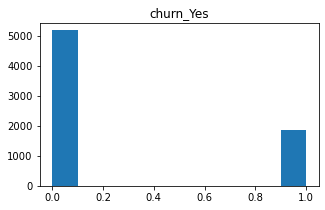

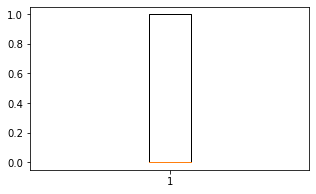

In [22]:
plt.figure(figsize=(5, 3))



plt.hist(y_train)
plt.title('churn_Yes')
plt.show()

,

plt.figure(figsize=(5, 3))
plt.boxplot(y_train)
plt.show()

#roughly 1/4 of the accounts are churned

# "no churn" will be our baseline

# and....nice work repeating work that you had done below. 

In [26]:
train.monthly_charges.value_counts(bins=5, sort=False)

# lots of monthly charges at the bottom and upper middle

(18.148999999999997, 38.35]    1006
(38.35, 58.45]                  540
(58.45, 78.55]                  758
(78.55, 98.65]                 1054
(98.65, 118.75]                 585
Name: monthly_charges, dtype: int64

In [27]:
train.total_charges.value_counts(bins=5, sort=False)

#again, total charges considerably skewed

(-8.686, 1736.96]     2189
(1736.96, 3473.92]     661
(3473.92, 5210.88]     479
(5210.88, 6947.84]     405
(6947.84, 8684.8]      209
Name: total_charges, dtype: int64